In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression, f_regression,SelectKBest
from sklearn.model_selection import cross_validate

In [3]:
from google.colab import drive 
drive.mount('/content/drive')
suicide_path = "/content/drive/MyDrive/219/master.csv" 
df_suicide = pd.read_csv(suicide_path)

Mounted at /content/drive


### 3.1

In [4]:
df_suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
df_suicide[' gdp_for_year ($) ']=df_suicide[' gdp_for_year ($) '].replace(',','', regex=True)
df_suicide[' gdp_for_year ($) ']=pd.to_numeric(df_suicide[' gdp_for_year ($) '])

In [6]:
df_suicide.shape

(27820, 12)

In [7]:
df_suicide.drop(labels=['country-year','HDI for year'],axis=1,inplace=True)

In [8]:
df_suicide.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', ' gdp_for_year ($) ', 'gdp_per_capita ($)',
       'generation'],
      dtype='object')

In [9]:
df_suicide[' gdp_for_year ($) ']

0         2156624900
1         2156624900
2         2156624900
3         2156624900
4         2156624900
            ...     
27815    63067077179
27816    63067077179
27817    63067077179
27818    63067077179
27819    63067077179
Name:  gdp_for_year ($) , Length: 27820, dtype: int64

### 3.1.1

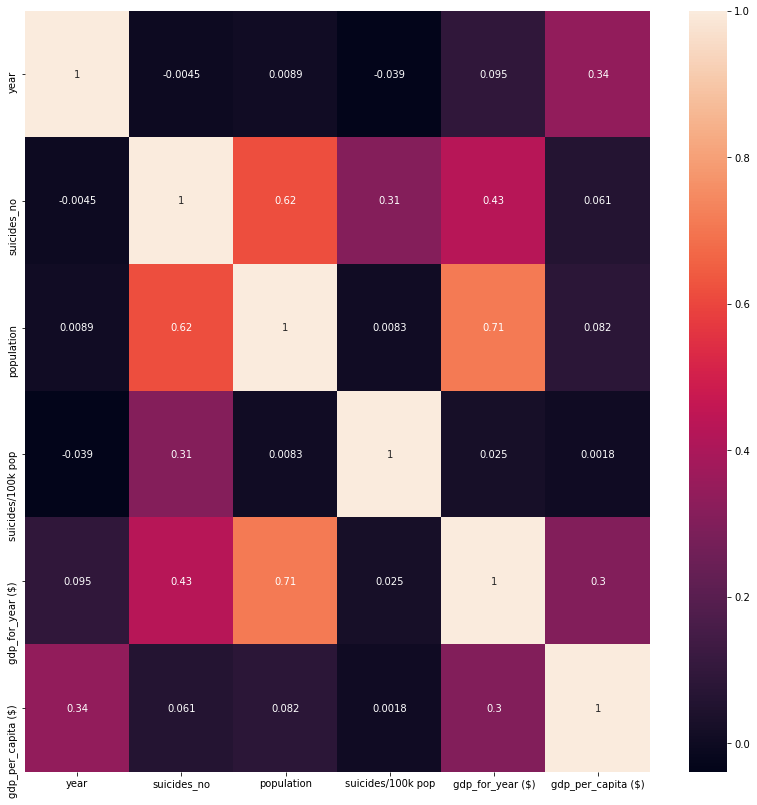

In [ ]:
plt.figure(figsize = (14, 14))
heatmap_suicide = sns.heatmap(df_suicide.corr(method = "pearson"), annot = True)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e88461850>,
      dtype=object)

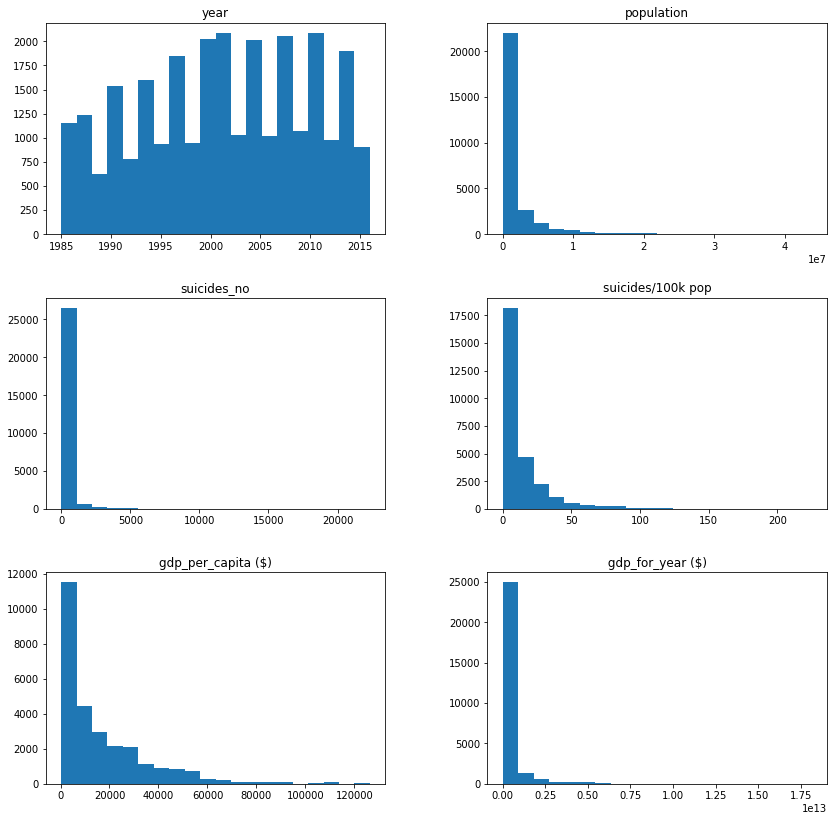

In [ ]:
numerical_features_suicide = ['year','population','suicides_no','suicides/100k pop','gdp_per_capita ($)',' gdp_for_year ($) ']
df_suicide.hist(column = numerical_features_suicide, figsize = (14, 14), grid = False, bins = 20)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

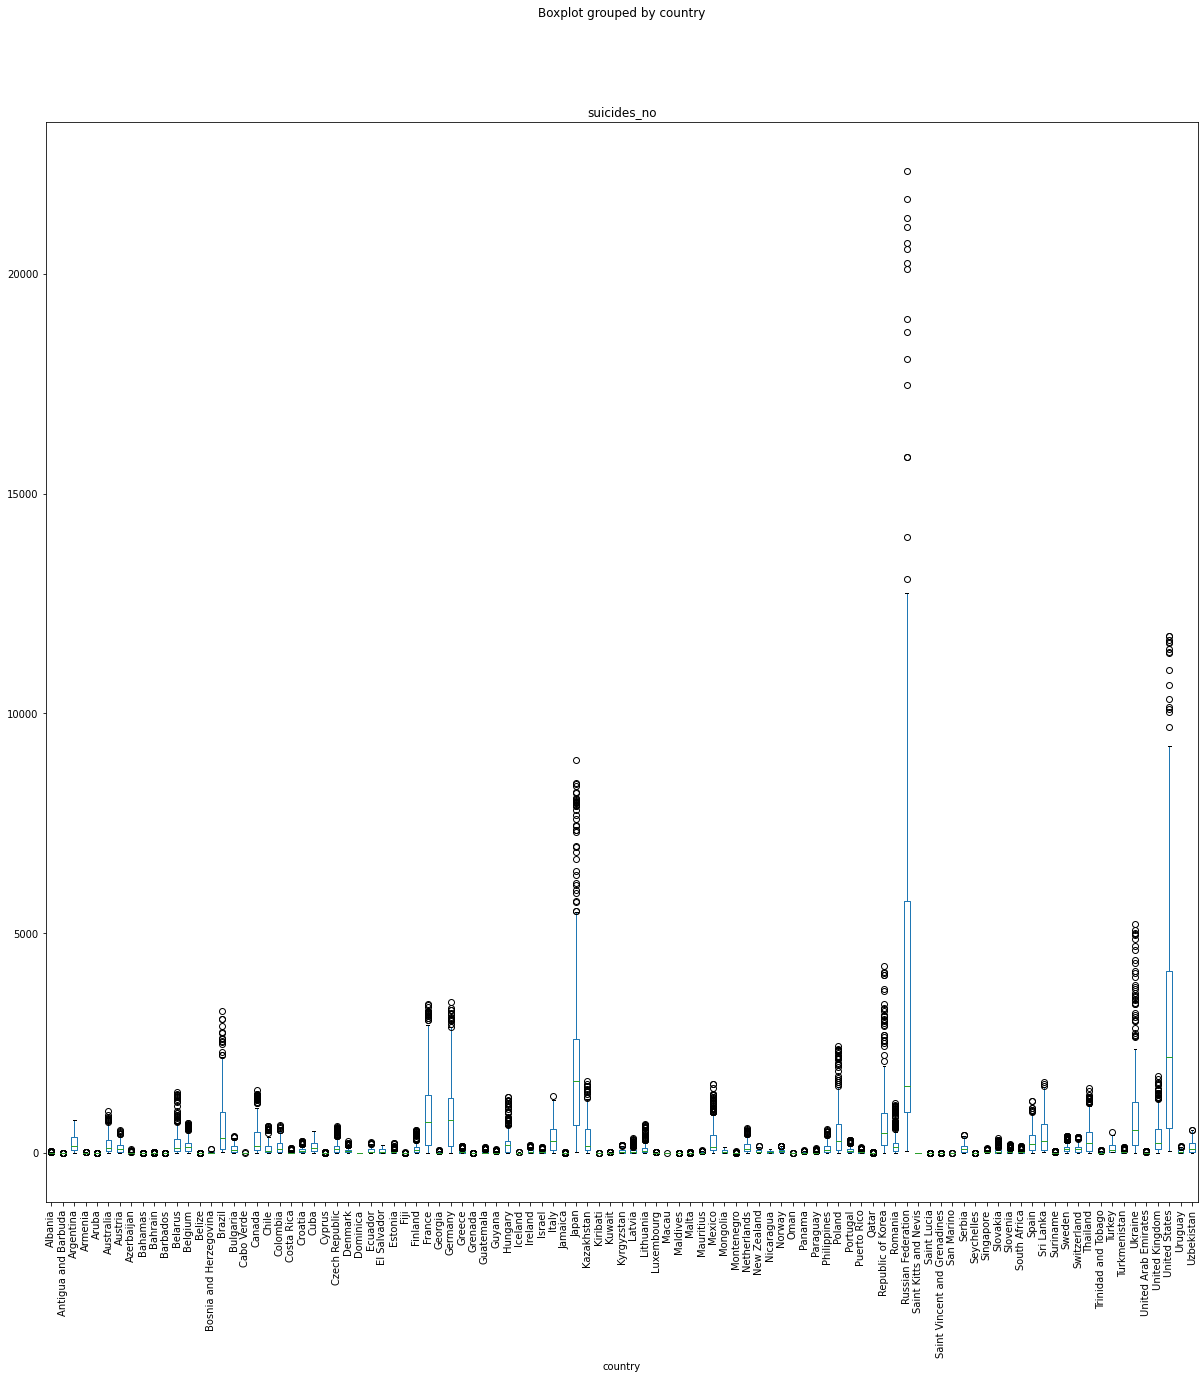

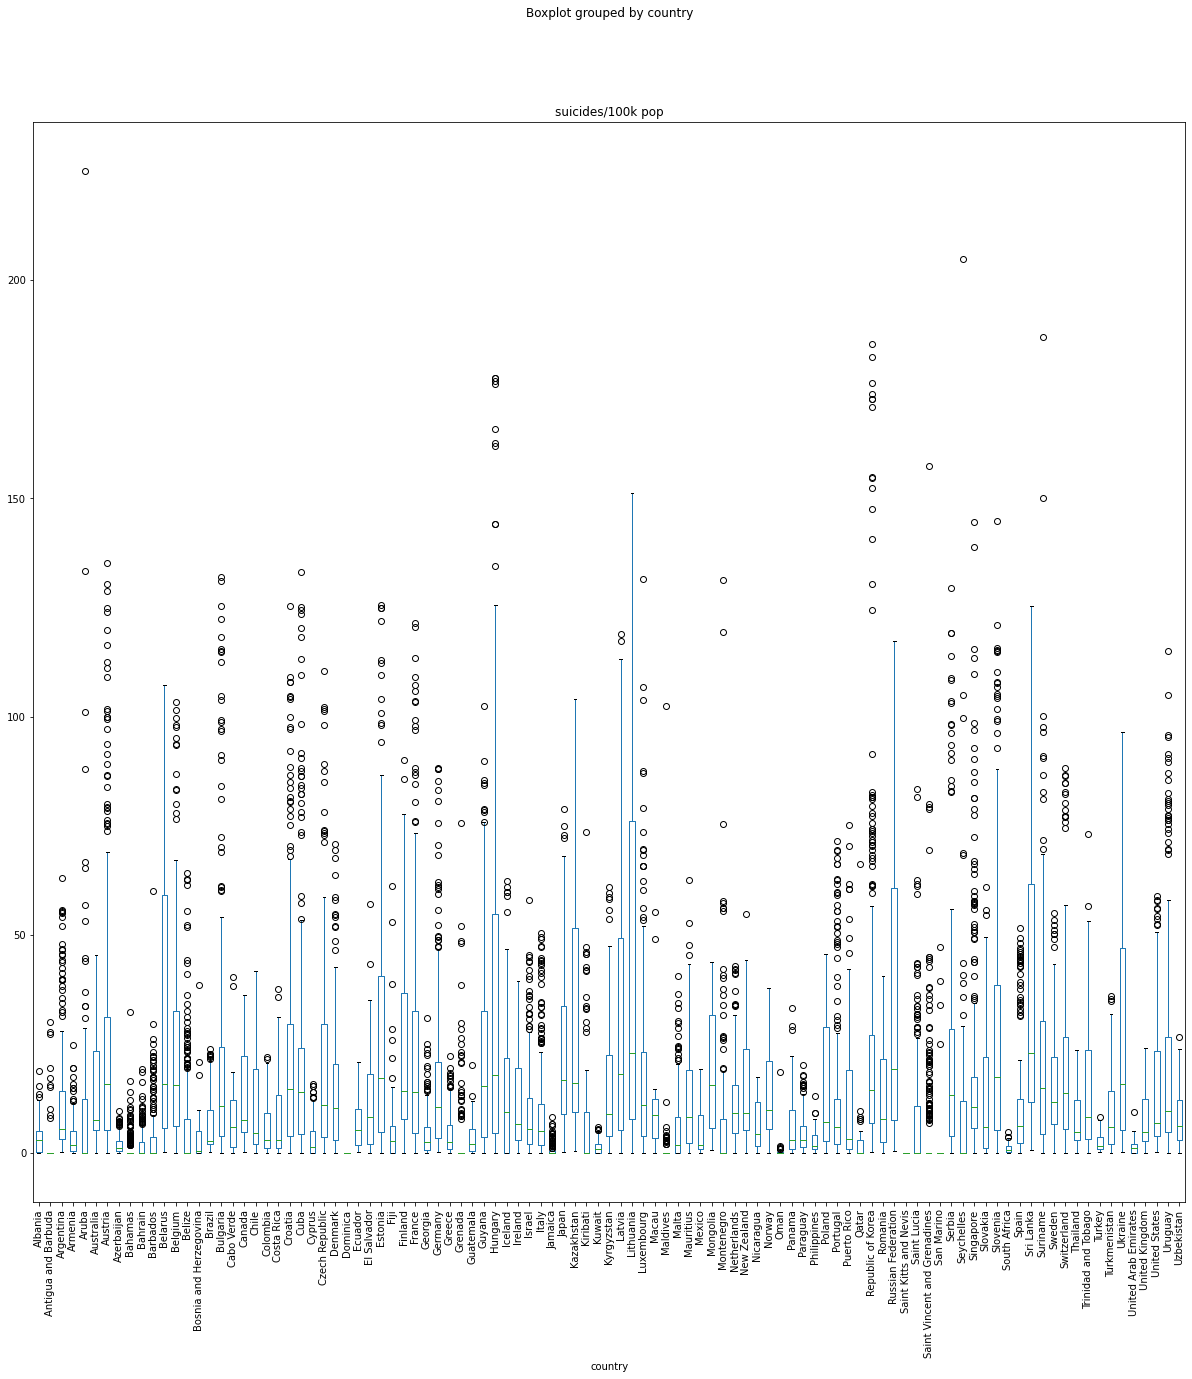

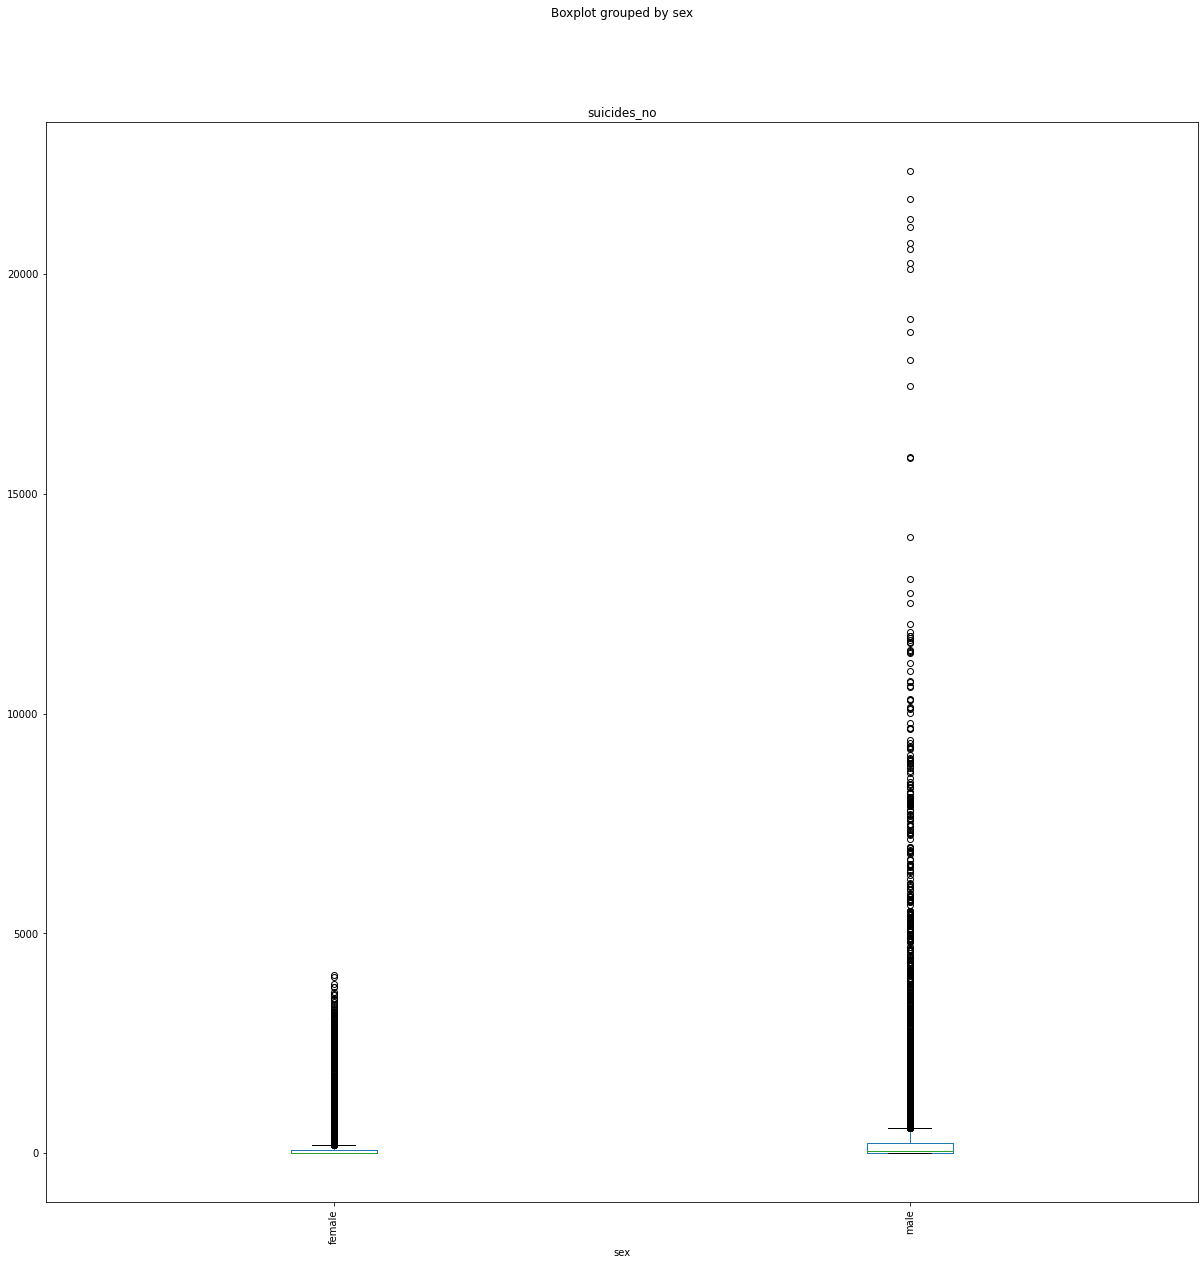

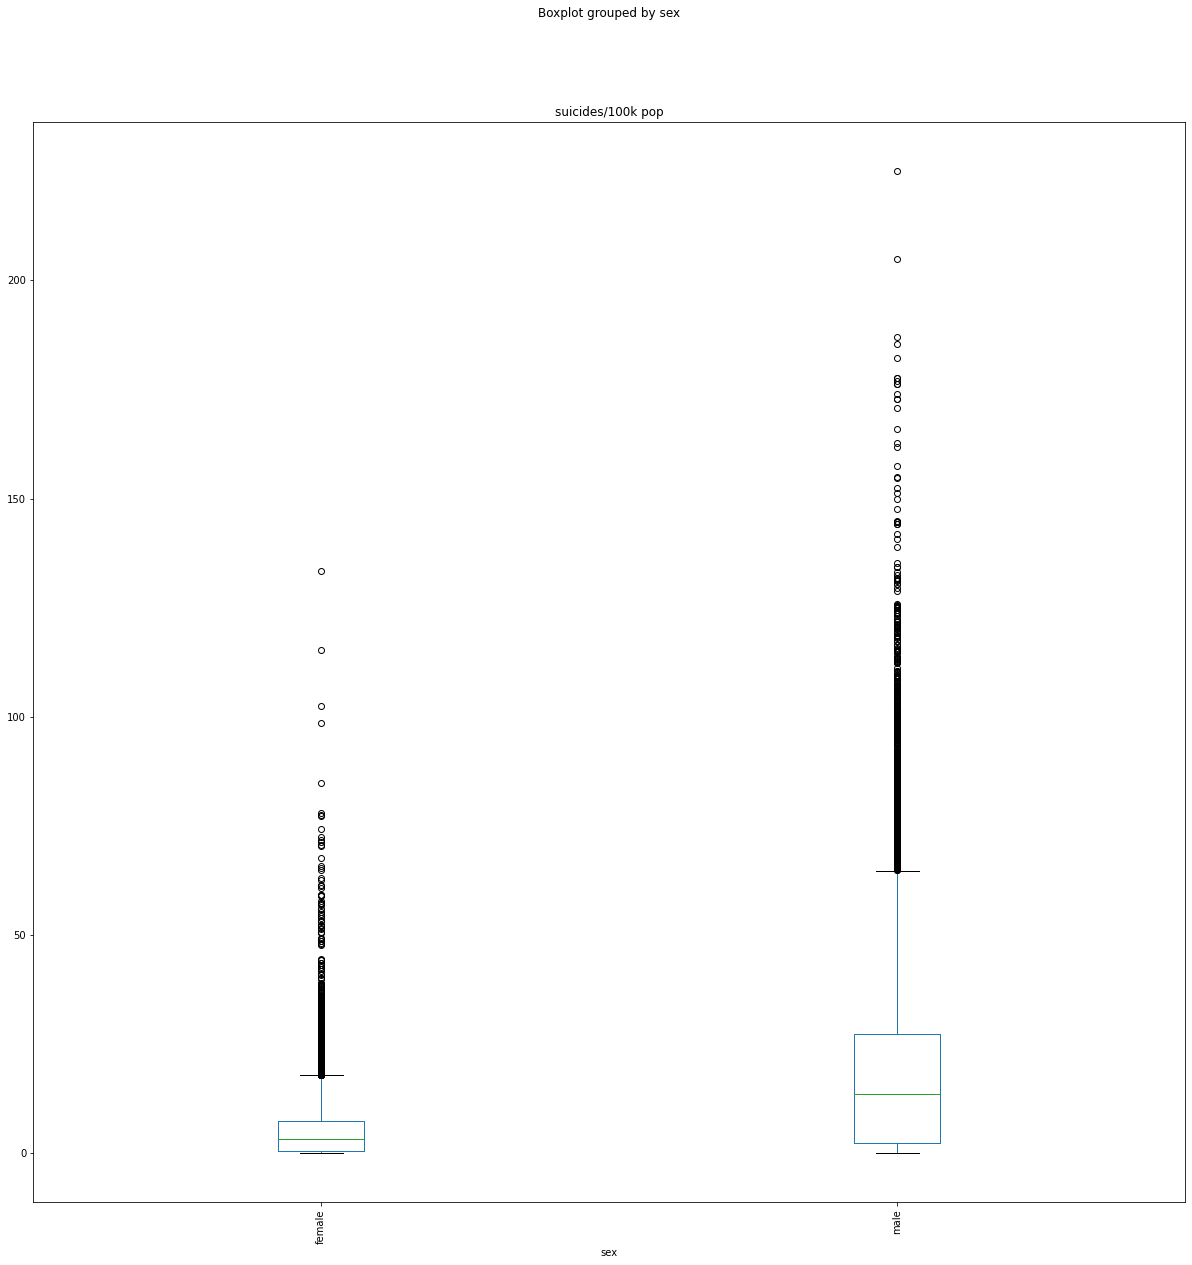

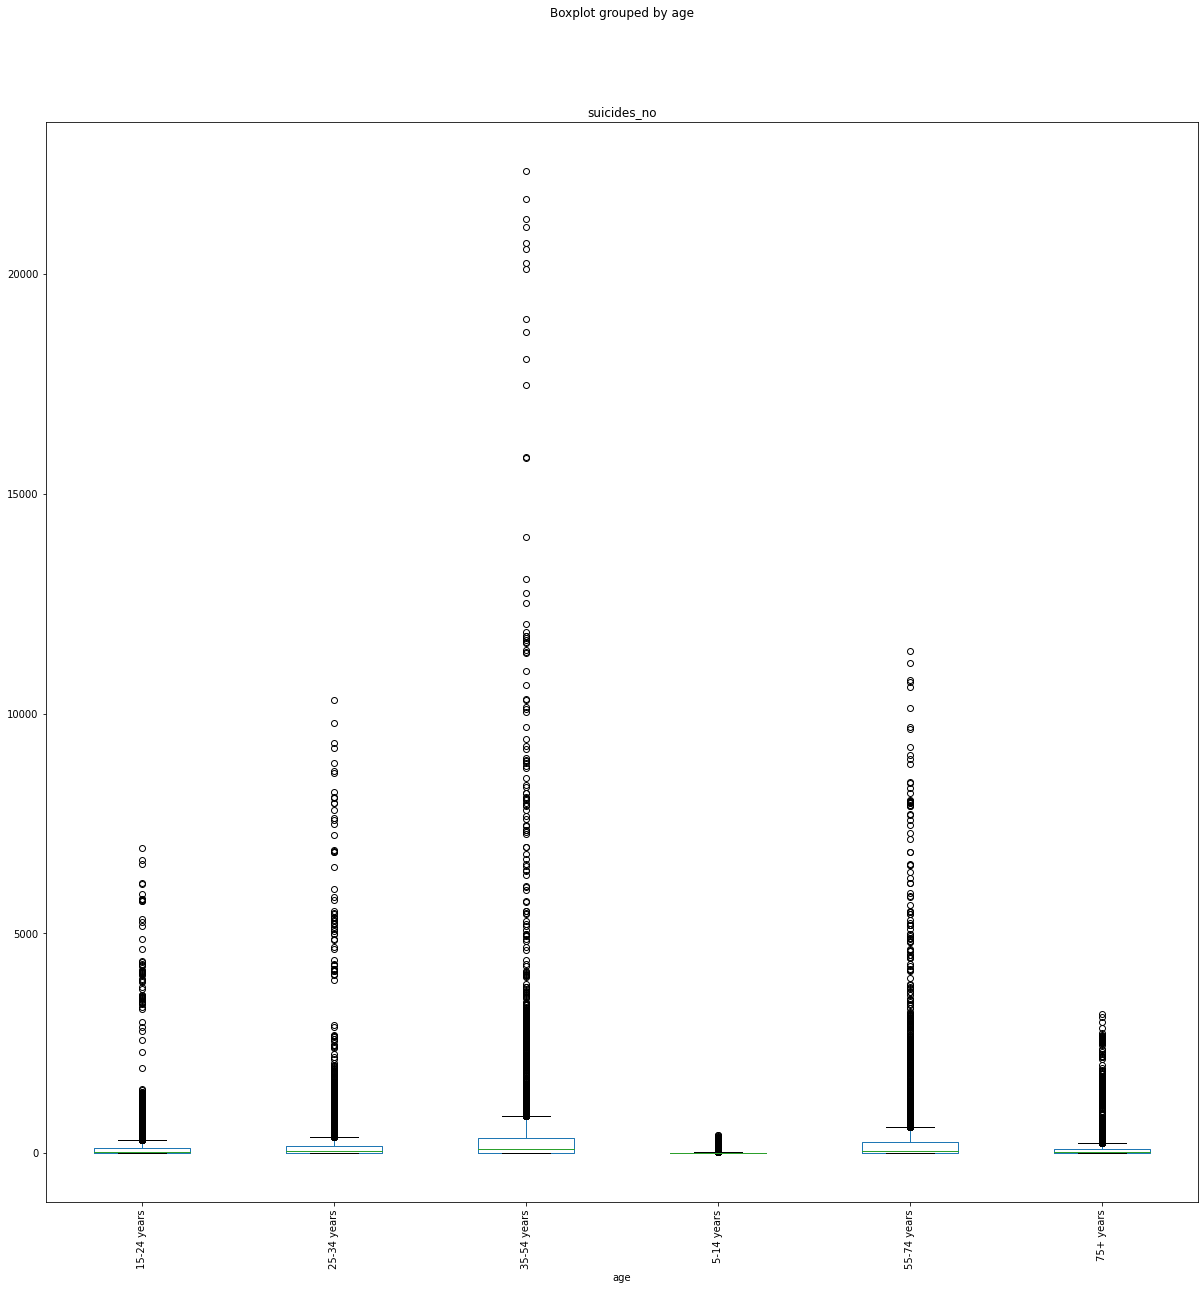

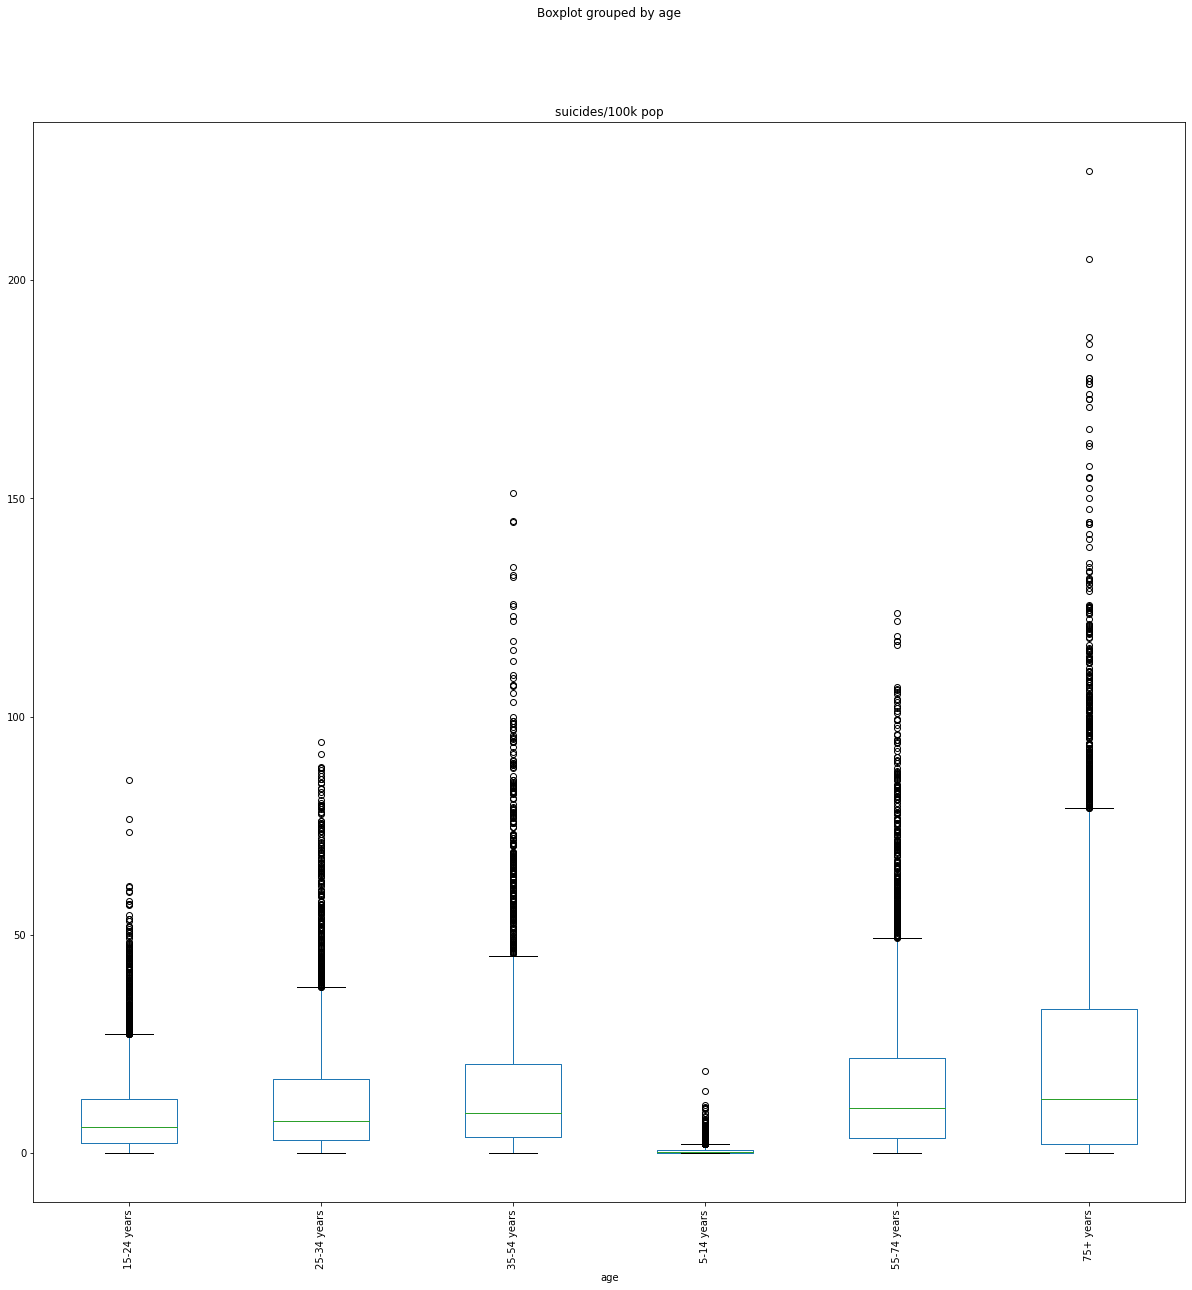

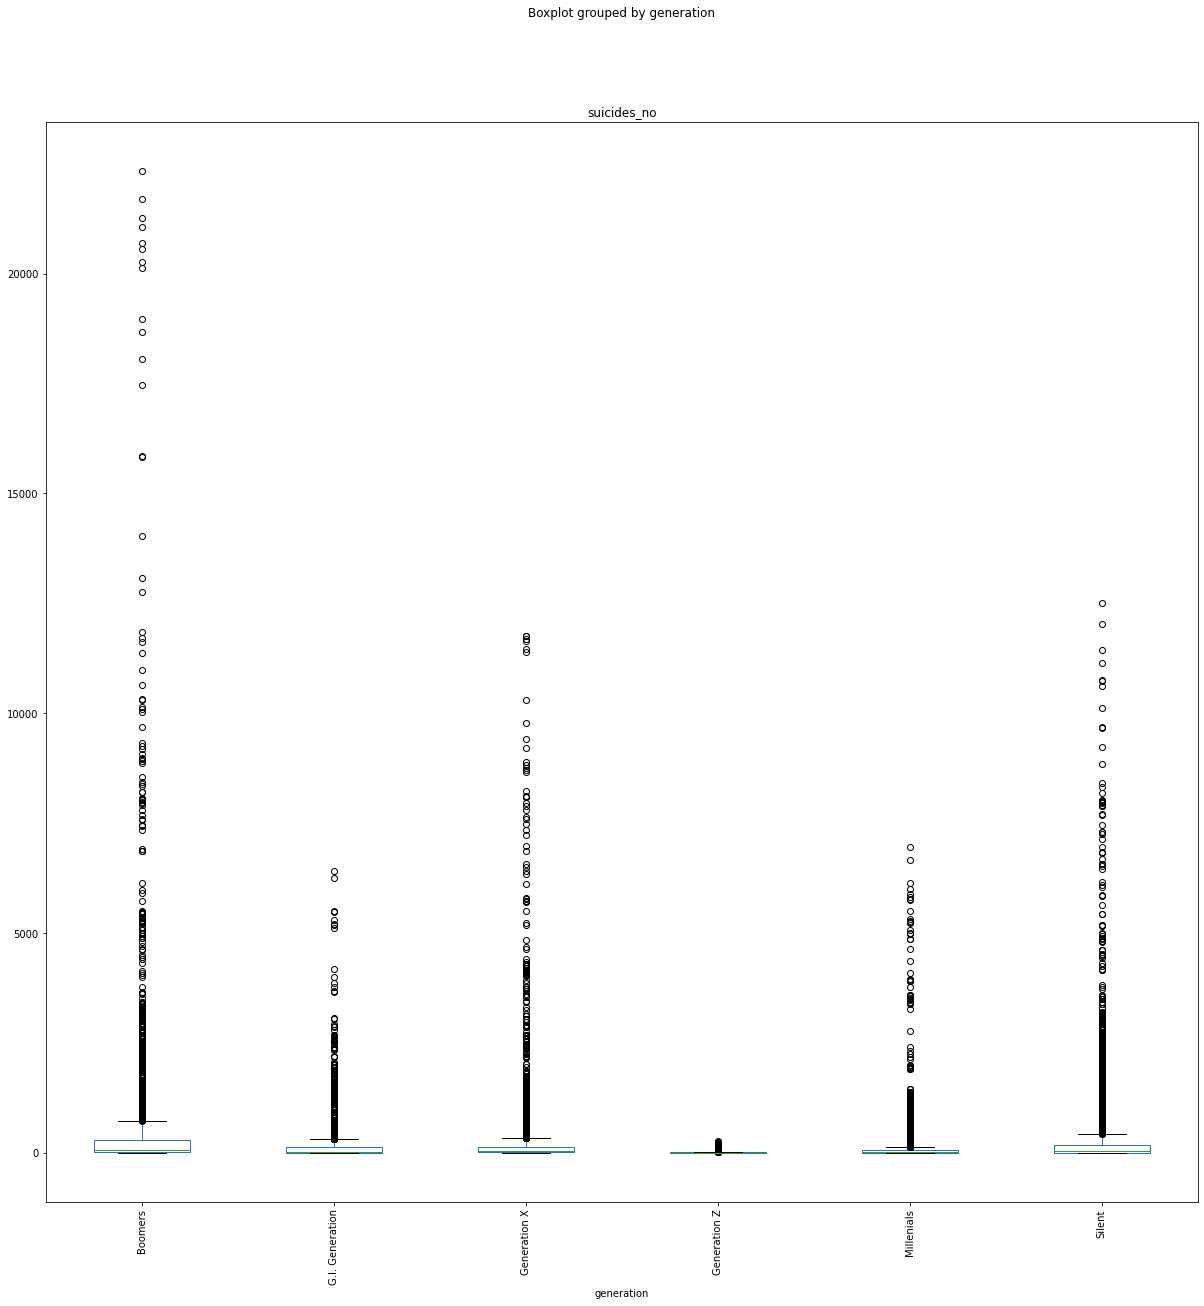

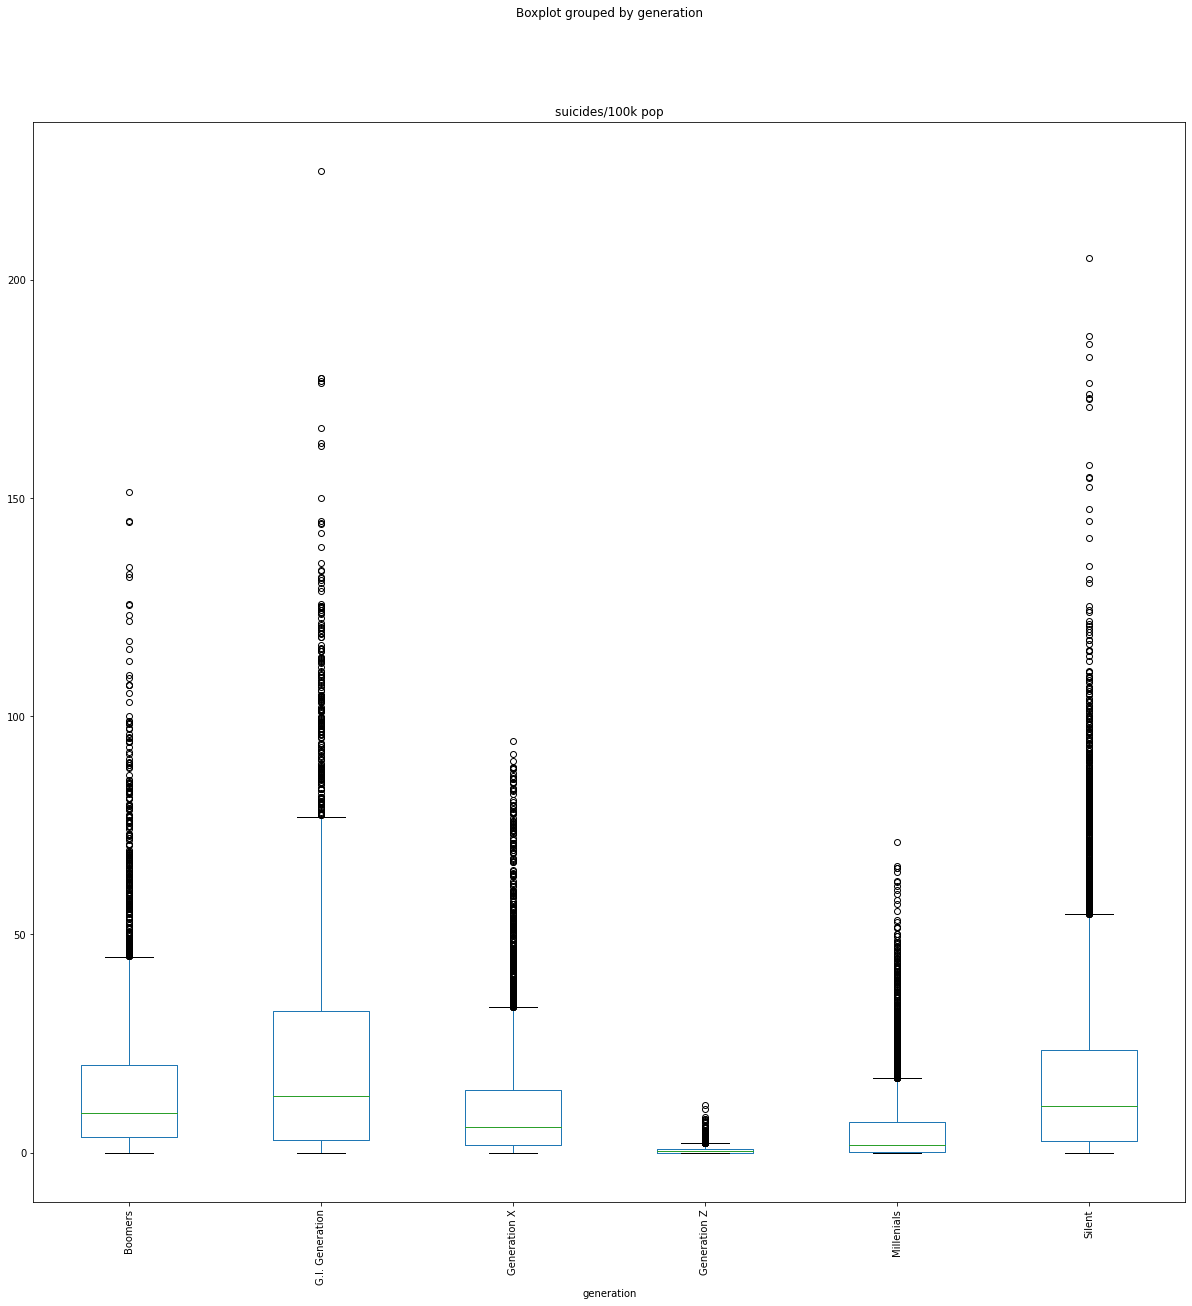

In [ ]:
categorical_features_suicide = ['country','sex','age','generation']
target_variable_suicide = ['suicides_no','suicides/100k pop']

for feature in categorical_features_suicide:
  for target in target_variable_suicide:
    a=df_suicide.boxplot(column = target,figsize=(20,20),by = feature, grid = False)
    a.tick_params(axis='x', rotation=90)

In [ ]:
countries = df_suicide['country'].unique()

In [ ]:
year_diff=[]
for i in countries:
  a=df_suicide[df_suicide['country']==i]['year'].max()
  b=df_suicide[df_suicide['country']==i]['year'].min()
  year_diff.append(a-b)
year_diff=np.array(year_diff)
year_diff_sort = year_diff.argsort()[::-1][:10]
year_diff_sort

array([41, 91, 57, 37,  6, 61, 43,  2, 66, 19])

In [ ]:
longest_countries=countries[year_diff_sort]
longest_countries

array(['Iceland', 'Thailand', 'Mauritius', 'Grenada', 'Austria',
       'Netherlands', 'Israel', 'Argentina', 'Panama', 'Chile'],
      dtype=object)

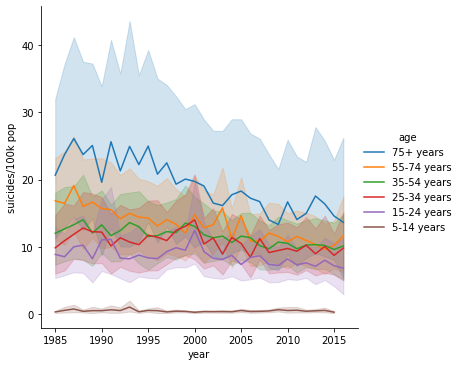

In [ ]:
df_longest_countries = df_suicide[df_suicide['country'].isin(longest_countries)]
sns.relplot(data=df_longest_countries,x='year',y='suicides/100k pop',hue='age',kind='line')

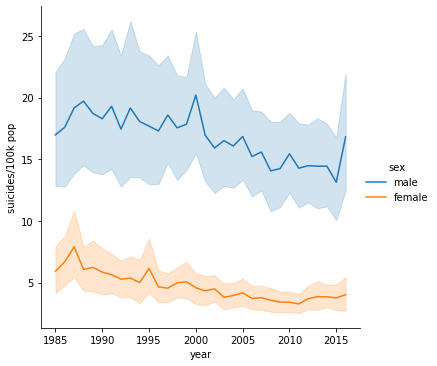

In [ ]:
sns.relplot(data=df_longest_countries,x='year',y='suicides/100k pop',hue='sex',kind='line')

### 3.1.2 - 3.1.4

In [11]:
pip install pycountry_convert

     |████████████████████████████████| 10.1MB 5.4MB/s 
     |████████████████████████████████| 245kB 43.7MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746863 sha256=edb2f703e8ee31588516b64cebc960b0a3f01fdb39f6716e54359e821abf56d7
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry
ERROR: datascience 0.10.6 has requirement coverage==3.7.1, but you'll have coverage 5.5 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: coveralls 0.5 has requirement coverage<3.999,>=3.6, but you'll have coverage 5.5 which is incompatible.
ERROR: pytest-mock 3.5.1 has requirement pytest>=5.0, but you'll have pytest 3.6.4 which is incompatible.
ERROR: pytest-cov 2.11.1 has requirement pytest>=4.6, but you'll have pytest 3.6.4 which is incompatible.
  Found existing installation: coverage 3.7.1

In [12]:
import pycountry_convert as pc


In [13]:
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name
df_suicide['continent']=""
for i in range(df_suicide['country'].shape[0]):
  if df_suicide['country'][i] =='Republic of Korea' or df_suicide['country'][i] =='Saint Vincent and Grenadines':
    continue
  df_suicide['continent'][i]=country_to_continent(df_suicide['country'][i])
df_suicide['continent']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


0        Europe
1        Europe
2        Europe
3        Europe
4        Europe
          ...  
27815      Asia
27816      Asia
27817      Asia
27818      Asia
27819      Asia
Name: continent, Length: 27820, dtype: object

In [14]:
search = ['Saint Vincent and Grenadines']
svg_index = df_suicide[df_suicide['country'].isin(search)].index.tolist()
for i in svg_index:
  df_suicide['continent'][i]="South America"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [15]:
search = ['Republic of Korea']
korea_index = df_suicide[df_suicide['country'].isin(search)].index.tolist()
for i in korea_index:
  df_suicide['continent'][i]="Asia"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [16]:
df_suicide_dummy = pd.get_dummies(df_suicide,columns=['continent','sex','age','generation'],drop_first=True)

In [17]:
df_suicide_dummy.drop(labels=['suicides_no','country','suicides/100k pop'],axis=1,inplace=True)

In [18]:
df_suicide_standard = StandardScaler().fit_transform(df_suicide_dummy[['year','population',' gdp_for_year ($) ','gdp_per_capita ($)']])

In [19]:
df_suicide_train = df_suicide_dummy.copy(deep=True)
df_suicide_train[['year','population',' gdp_for_year ($) ','gdp_per_capita ($)']]=df_suicide_standard
y=df_suicide['suicides/100k pop']



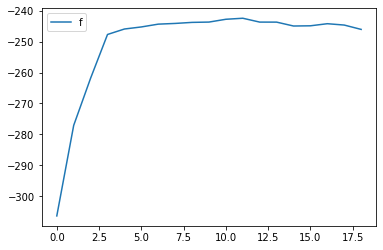

In [20]:
from sklearn.linear_model import LinearRegression
x_train = df_suicide_train
y_train = y
mutual=[]
fregre=[]
for i in range(1,20):
  fscore_selected = SelectKBest(score_func=f_regression, k=i).fit_transform(x_train, y_train)
  bike_f = cross_validate(LinearRegression(), fscore_selected, y_train, scoring=['neg_mean_squared_error'], cv=10)
  rmse_f = bike_f['test_neg_mean_squared_error']
  fregre.append(rmse_f.mean())

plt.plot(fregre,label='f')
plt.legend()

best_f=np.argmax(fregre)

In [21]:
fscore_selected = SelectKBest(score_func=f_regression, k=11).fit(x_train, y_train)

In [22]:
best_f

11

In [23]:
fscore_selected 

SelectKBest(k=11, score_func=<function f_regression at 0x7f79f1a2fb90>)

In [24]:
cols = fscore_selected.get_support(indices=True)
features_df_new = x_train.iloc[:,cols]
features_df_new

,continent_Europe,continent_North America,sex_male,age_5-14 years,age_55-74 years,age_75+ years,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,1,0,1,0,0,0,0,1,0,0,0
1,1,0,1,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,1,0,0,0
3,1,0,1,0,0,1,1,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
27815,0,0,0,0,0,0,0,1,0,0,0
27816,0,0,0,0,0,1,0,0,0,0,1
27817,0,0,1,1,0,0,0,0,1,0,0
27818,0,0,0,1,0,0,0,0,1,0,0


In [25]:
data_f_selected = SelectKBest(score_func=f_regression, k=11).fit_transform(x_train, y_train)
bike_f = cross_validate(LinearRegression(),data_f_selected,y_train,scoring='neg_root_mean_squared_error', 
                            return_train_score=True, cv=10)
linear_bike=cross_validate(LinearRegression(),x_train,y_train,scoring='neg_root_mean_squared_error', 
                            return_train_score=True, cv=10)

In [26]:
bike_f['test_score'].mean()

-15.305520233264938

In [27]:
linear_bike['test_score'].mean()

-15.435718311206898

### 3.2.1

In [ ]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

In [ ]:
pipe_line = Pipeline([
    ('model', LinearRegression())
])

param_grid = {
    'model': [Ridge(max_iter=10000), Lasso(max_iter=10000)],
    'model__alpha': [10.0**x for x in np.arange(-3,4)]
}

In [ ]:
grid_standard = GridSearchCV(pipe_line,param_grid=param_grid,cv=10,scoring='neg_root_mean_squared_error',n_jobs=-1,return_train_score=True,verbose=1).fit(data_f_selected,y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    2.6s finished


In [ ]:
data_f_selected_ns = SelectKBest(score_func=f_regression, k=10).fit_transform(df_suicide_dummy, y_train)
grid_n_standard = GridSearchCV(pipe_line,param_grid=param_grid,cv=10,scoring='neg_root_mean_squared_error',n_jobs=-1,return_train_score=True,verbose=1).fit(data_f_selected_ns,y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    1.2s finished


In [ ]:
result1 = pd.DataFrame(grid_n_standard.cv_results_)[['mean_test_score', 'mean_train_score', 'param_model' ]]
result1['Standardize'] =0
result2 = pd.DataFrame(grid_standard.cv_results_)[['mean_test_score', 'mean_train_score', 'param_model']]
result2['Standardize'] = 1

results = pd.concat([result1, result2])
results = results.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
results

,mean_test_score,mean_train_score,param_model,Standardize
0,-15.297404,-15.393794,"Ridge(alpha=100.0, copy_X=True, fit_intercept=...",1
1,-15.303900,-15.392730,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",1
2,-15.304535,-15.392536,"Ridge(alpha=100.0, copy_X=True, fit_intercept=...",1
3,-15.305343,-15.392524,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",1
4,-15.305420,-15.392522,"Ridge(alpha=100.0, copy_X=True, fit_intercept=...",1
5,-15.305510,-15.392521,"Ridge(alpha=100.0, copy_X=True, fit_intercept=...",1
6,-15.305519,-15.392521,"Ridge(alpha=100.0, copy_X=True, fit_intercept=...",1
7,-15.305520,-15.392521,"Ridge(alpha=100.0, copy_X=True, fit_intercept=...",1
8,-15.308852,-15.413462,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",1
9,-15.316081,-15.471623,"Ridge(alpha=100.0, copy_X=True, fit_intercept=...",1


In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
lm_fit = sm.OLS(y_train, sm.add_constant(df_suicide_dummy)).fit()
print(lm_fit.pvalues)

const                          1.084473e-03
year                           8.790827e-04
population                     2.072198e-03
 gdp_for_year ($)              7.528723e-11
gdp_per_capita ($)             2.090879e-47
continent_Asia                 4.696579e-11
continent_Europe               8.209215e-88
continent_North America        4.747729e-01
continent_Oceania              7.666389e-12
continent_South America        1.048222e-06
sex_male                       0.000000e+00
age_25-34 years                1.913446e-19
age_35-54 years                1.531597e-27
age_5-14 years                5.950804e-112
age_55-74 years                1.520674e-21
age_75+ years                  2.233077e-54
generation_G.I. Generation     7.043793e-01
generation_Generation X        3.364701e-01
generation_Generation Z        1.076723e-02
generation_Millenials          2.794787e-01
generation_Silent              2.439058e-02
dtype: float64


### 3.2.2 Polynomial

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pipe_poly = Pipeline([
    ('poly', PolynomialFeatures()),
    ('standardize', StandardScaler()),
    ('model', Ridge(alpha=100))
])
param_grid_poly = {
    'poly__degree': np.arange(1,5,1)
}
df_bike_selected = SelectKBest(score_func=f_regression, k=10).fit_transform(data_f_selected, y_train)
grid_poly = GridSearchCV(pipe_poly, param_grid=param_grid_poly, cv=10, n_jobs=1, verbose=1, 
                         scoring='neg_root_mean_squared_error', return_train_score=True).fit(df_bike_selected, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   26.3s finished


In [ ]:
result = pd.DataFrame(grid_poly.cv_results_)[['param_poly__degree','mean_test_score','mean_train_score']]
result

,param_poly__degree,mean_test_score,mean_train_score
0,1,-15.330860,-15.423485
1,2,-14.303820,-14.310242
2,3,-14.221883,-14.205939
3,4,-14.218914,-14.200961


Text(0.5, 1.0, 'train vs. degree')

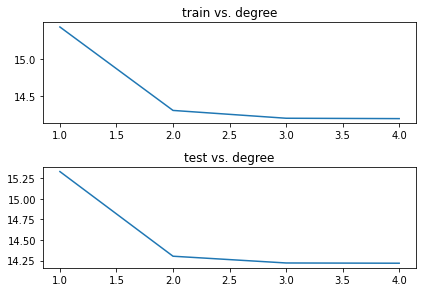

In [ ]:
fig,ax = plt.subplots(2)
ax[1].plot(result['param_poly__degree'],-result['mean_test_score'])
ax[1].set_title('test vs. degree')
fig.tight_layout()
ax[0].plot(result['param_poly__degree'],-result['mean_train_score'])
ax[0].set_title('train vs. degree')

### NN

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
mlp = MLPRegressor(solver='adam',max_iter=2000,beta_1=0.9,beta_2=0.99)

alpha = [0.1,0.01]
param_grid_nn={
    
    'hidden_layer_sizes':[(32,32,32)],
    'activation':['identity', 'relu'],
    'alpha': alpha
    
}
#f_bike_selected = SelectKBest(score_func=f_regression, k=10).fit_transform(df_bike3, y_train)
#df_bike_selected= StandardScaler().fit_transform(df_bike_selected)

grid_nn = GridSearchCV(mlp, param_grid=param_grid_nn, cv=10, n_jobs=-1, verbose=1, 
                        scoring='neg_root_mean_squared_error', return_train_score=True).fit(df_bike_selected, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.0min finished


In [ ]:
nn_results = pd.DataFrame(grid_nn.cv_results_)[['param_alpha','param_activation','param_hidden_layer_sizes','mean_test_score','mean_train_score']]
nn_results=nn_results.sort_values(by=['mean_test_score'],ascending=False)
nn_results.head()

,param_alpha,param_activation,param_hidden_layer_sizes,mean_test_score,mean_train_score
3,0.01,relu,"(32, 32, 32)",-14.129354,-14.217982
2,0.1,relu,"(32, 32, 32)",-14.150664,-14.215628
1,0.01,identity,"(32, 32, 32)",-15.309918,-15.441639
0,0.1,identity,"(32, 32, 32)",-15.334521,-15.443702


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
pipe_rfr = Pipeline([
    ('standardize', StandardScaler()),
    ('model', RandomForestRegressor())
])

param_grid_rfr = {
    'model__max_features': np.arange(1,18,2),
}

grid_num_features = GridSearchCV(pipe_rfr, param_grid=param_grid_rfr, cv=10, n_jobs=-1, verbose=1, 
                                 scoring='neg_root_mean_squared_error', 
                                 return_train_score=True).fit(x_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  7.7min finished


In [ ]:
rf_feature_results = pd.DataFrame(grid_num_features.cv_results_)[['mean_test_score', 'mean_train_score', 'param_model__max_features']]
rf_feature_results=rf_feature_results.sort_values(by=['mean_test_score'],ascending=False)
rf_feature_results.head()

,mean_test_score,mean_train_score,param_model__max_features
0,-14.511011,-3.058922,1
1,-14.619454,-2.930128,3
2,-14.745810,-2.821251,5
3,-14.846291,-2.766310,7
4,-15.132316,-2.732594,9


In [ ]:
pipe_rfr = Pipeline([
    ('standardize', StandardScaler()),
    ('model', RandomForestRegressor(max_features=1))
])

param_grid_rfr = {
    'model__n_estimators': np.arange(10, 210, 10),
}

grid_num_estimators = GridSearchCV(pipe_rfr, param_grid=param_grid_rfr, cv=10, n_jobs=-1, verbose=1, 
                                 scoring='neg_root_mean_squared_error', 
                                 return_train_score=True).fit(x_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   33.0s
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  8.3min finished


In [ ]:
rf_estimator_results = pd.DataFrame(grid_num_estimators.cv_results_)[['mean_test_score', 'mean_train_score', 'param_model__n_estimators']]
rf_estimator_results=rf_estimator_results.sort_values(by=['mean_test_score'],ascending=False)
rf_estimator_results.head()

,mean_test_score,mean_train_score,param_model__n_estimators
14,-14.461911,-3.029195,150
12,-14.463901,-3.041489,130
13,-14.472844,-3.032651,140
16,-14.478346,-3.025127,170
8,-14.480419,-3.064978,90


In [ ]:
pipe_rfr = Pipeline([
    ('standardize', StandardScaler()),
    ('model', RandomForestRegressor(n_estimators=150,max_features=1))
])

param_grid_rfr = {

    'model__max_depth': np.arange(2, 26, 1)
}

grid_num_depth = GridSearchCV(pipe_rfr, param_grid=param_grid_rfr, cv=10, n_jobs=-1, verbose=1, 
                                 scoring='neg_root_mean_squared_error', 
                                 return_train_score=True).fit(x_train, y_train)

rf_depth_results = pd.DataFrame(grid_num_depth.cv_results_)[['mean_test_score', 'mean_train_score','param_model__max_depth']]
rf_depth_results=rf_depth_results.sort_values(by=['mean_test_score'],ascending=False)
rf_depth_results.head()

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   28.2s
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  8.1min finished


,mean_test_score,mean_train_score,param_model__max_depth
11,-14.208148,-8.577270,13
12,-14.267373,-7.584526,14
13,-14.276688,-6.586043,15
14,-14.305408,-5.725391,16
10,-14.314115,-9.745574,12


In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
import pydot
from sklearn.tree import export_graphviz
from IPython.display import Image
rf_viz = RandomForestRegressor(n_estimators=150, max_features=3, max_depth=4, oob_score=True)
rf_viz.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

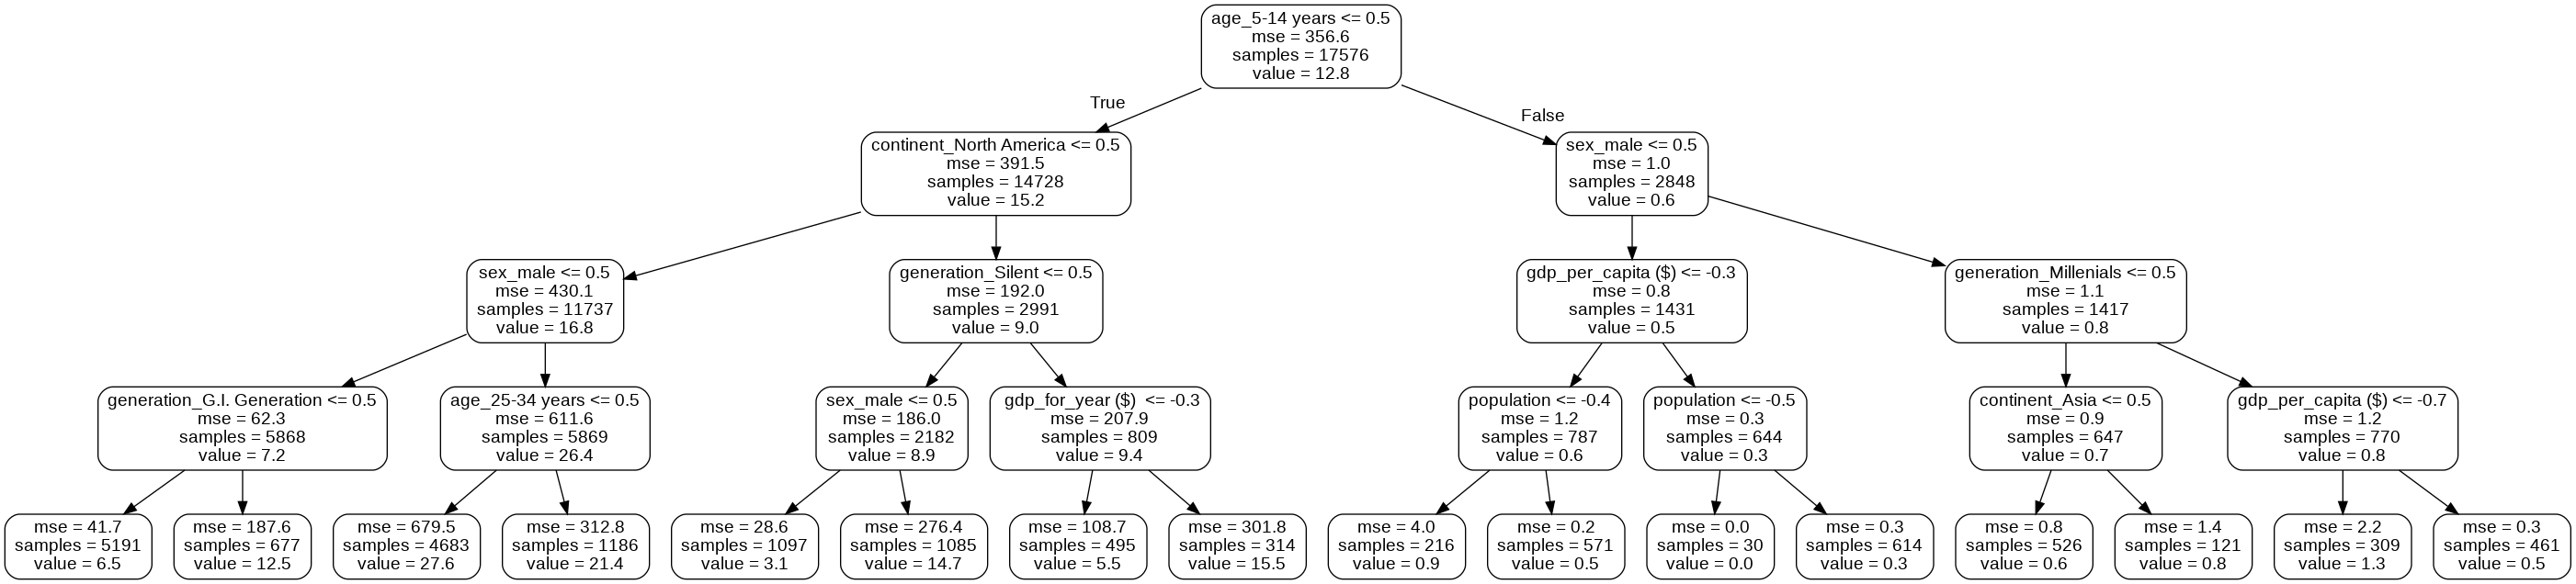

In [46]:
tree = rf_viz.estimators_[1]
export_graphviz(tree, out_file = 'tree.dot', feature_names = x_train.columns, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
Image(graph.create_png())

In [35]:
from sklearn.ensemble import RandomForestRegressor
clf= RandomForestRegressor(n_estimators=150,max_features=3,max_depth=13,oob_score=True).fit(x_train,y_train)

In [36]:
r_2,oob= clf.score(x_train, y_train),clf.oob_score_
r_2,oob

(0.8365324477769035, 0.737444527765355)